Grid SpinnerLidar measurements from the OSSE and the reconstruction simulations.

In [1]:
from datetime import timedelta
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
from scipy.stats import binned_statistic_2d
import xarray as xr

In [2]:
### Load data
f_in = Path('/projects/wakedynamics/orybchuk/bcs-ldm/analyze/inflow_validation/sandia_scripts/OSSE_Spinners/sim2/MatlabProcessedSpinner.csv')
df = pd.read_csv(f_in)

n_rows = len(df)

In [3]:
### Add proper time axis to df
ref_time = pd.Timestamp('1970-01-01 03:30:00')
    
rel_time = (1e9*(df['trueScanTime'] - df['trueScanTime'].iloc[0])).astype('timedelta64[ns]')
df['time'] = ref_time + rel_time
df = df.set_index('time')

In [4]:
### Center coords on the turbine
df['yplot'] = df['yplot'] - df['yplot'].mean()
df['zplot'] = df['zplot'] - df['zplot'].mean()

In [5]:
df

,PitchAngs,RollAngs,YawAngs,txWTG,tyWTG,tzWTG,uExact,vExact,wExact,vmeas,xOut,yOut,zOut,xplot,yplot,zplot,trueScanTime
time,,,,,,,,,,,,,,,,,
1970-01-01 03:30:00.000000000,5.002790,-6.169617,0.000001,7676.143979,3839.999186,120.337445,8.425805,0.003831,-1.027069,7.145197,-109.329524,6.895241,-63.779196,7561.636726,0.146843,-67.440469,12600.000000
1970-01-01 03:30:00.002032249,5.003134,-6.069600,0.000001,7676.144040,3839.999215,120.337470,8.384469,0.012720,-1.165483,7.058583,-109.335600,10.794569,-63.225800,7561.642451,4.194838,-67.301663,12600.002032
1970-01-01 03:30:00.004064499,5.003463,-5.969574,0.000001,7676.144100,3839.999243,120.337493,8.355014,0.045902,-1.196276,7.020130,-109.354488,14.646954,-62.412997,7561.659569,8.222639,-66.886005,12600.004064
1970-01-01 03:30:00.006096749,5.003777,-5.869538,0.000001,7676.144157,3839.999271,120.337515,8.324128,0.079465,-1.194516,7.002297,-109.386165,18.434054,-61.344867,7561.687909,12.210170,-66.195773,12600.006097
1970-01-01 03:30:00.008128999,5.004077,-5.769493,0.000001,7676.144212,3839.999298,120.337536,8.292728,0.100568,-1.185894,6.992340,-109.430588,22.137880,-60.026829,7561.727187,16.137586,-65.234749,12600.008129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970-01-01 03:45:00.991871000,6.290804,71068.856025,0.014655,7677.663138,3839.816503,120.411398,8.744072,0.956937,0.978653,7.654030,-122.510128,16.391188,-28.156393,7559.460028,0.466596,32.809392,13500.991871
1970-01-01 03:45:00.993903250,6.290731,71069.018663,0.014662,7677.663002,3839.816355,120.411394,8.732567,1.009312,0.984004,7.682040,-122.793577,17.561170,-26.145089,7559.055836,-1.664543,31.726324,13500.993903
1970-01-01 03:45:00.995935500,6.290657,71069.181300,0.014669,7677.662867,3839.816209,120.411391,8.709337,1.048226,0.986927,7.714691,-123.070068,18.535439,-24.092619,7558.642367,-3.642314,30.495933,13500.995936


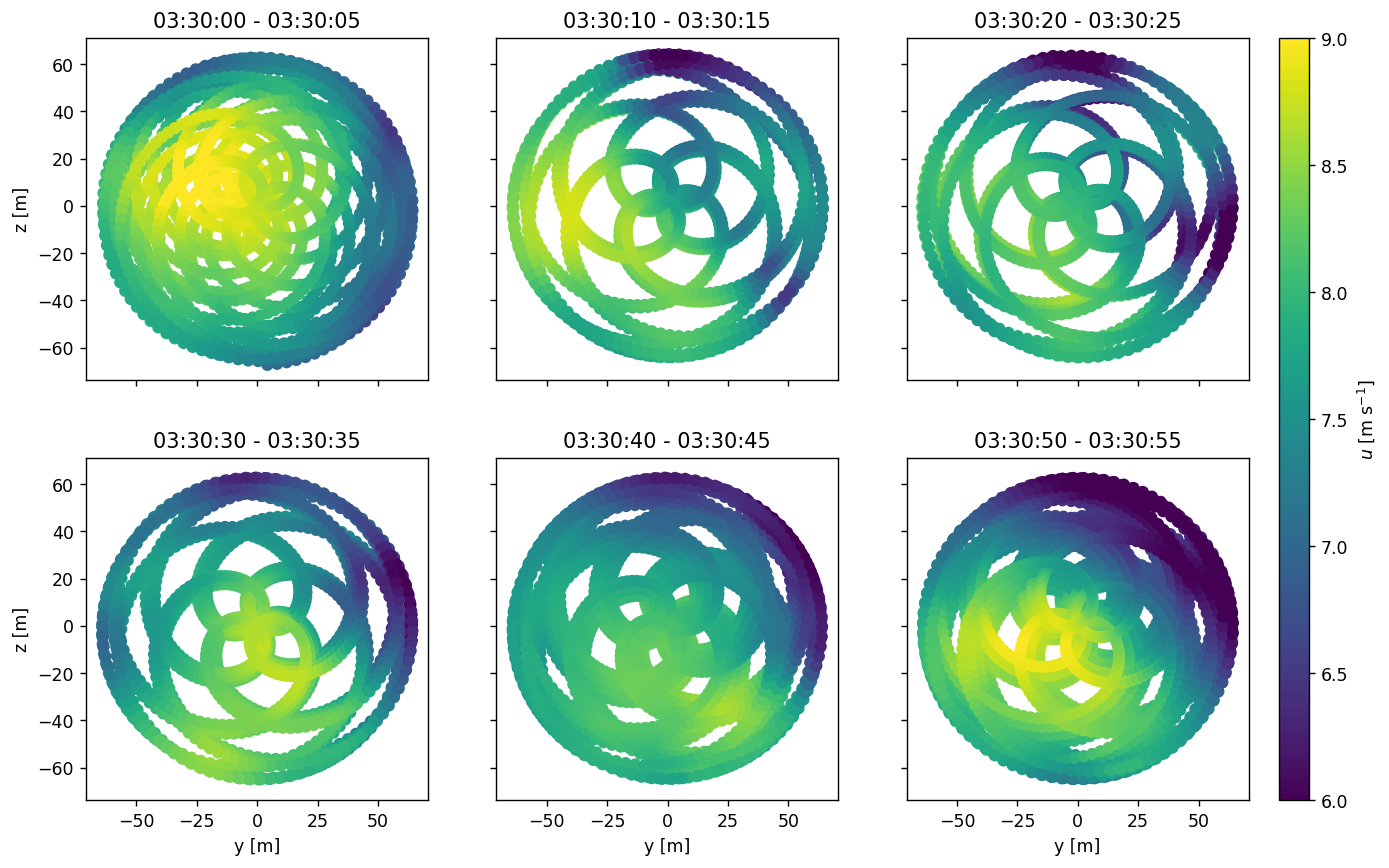

In [6]:
fig, ax = plt.subplots(2, 3, figsize=(12,8), dpi=125, sharex=True, sharey=True)

## Decorate
for axs in ax[-1,:]:
    axs.set_xlabel('y [m]')
for axs in ax[:,0]:
    axs.set_ylabel('z [m]')

vmin, vmax = 6, 9

for axs in ax.flatten():
    axs.set_box_aspect(1)

## Data
start_time = ref_time
end_time = start_time + timedelta(seconds=5)
df_trim = df[(df.index > start_time) & (df.index < end_time)]

for i, axs in enumerate(ax.flatten()):
    axs.set_title(f'{start_time.strftime("%H:%M:%S")} - {end_time.strftime("%H:%M:%S")}')
    im0 = axs.scatter(df_trim['yplot'],
               df_trim['zplot'],
               c=df_trim['vmeas'],
               vmin=vmin,
               vmax=vmax,
               cmap='viridis')
    
    start_time = start_time + timedelta(seconds=10)
    end_time = end_time + timedelta(seconds=10)
    df_trim = df[(df.index > start_time) & (df.index < end_time)]

cax0 = fig.add_axes([ax[0,-1].get_position().x1+0.02,
                     ax[-1,-1].get_position().y0,
                     0.02,
                     ax[0,-1].get_position().y1-ax[-1,-1].get_position().y0])
cbar0 = fig.colorbar(im0, cax=cax0)
cbar0.set_label('$u$ [m s$^{-1}$]')
cbar0.ax.tick_params()


plt.show()

# Create a gridded version of spinner measurements

In [7]:
### Create a gridded version of spinner measurements
## Grid properties
dy_grid, dz_grid = 10, 10  # meters
dt_grid = 5  # sec
# dt_grid = 1  # sec
tgrid_start = pd.Timestamp(df.index[0]).ceil(freq='s')
tgrid_end = pd.Timestamp(df.index[-1]).floor(freq='s')
tgrid = pd.date_range(tgrid_start, tgrid_end, freq=f'{dt_grid}s')

## Initialize an Xarray Dataset
# ycoords = np.arange(round(df['yplot'].values.min())-1, round(df['yplot'].values.max())+1, dy_grid)
# zcoords = np.arange(round(df['zplot'].values.min())-1, round(df['zplot'].values.max())+1, dz_grid)
ycoords = np.arange(-80, 80+dy_grid, dy_grid)
zcoords = np.arange(-80, 80+dz_grid, dz_grid)

coords_grid = {'y': ycoords,
               'z': zcoords,
               'time': tgrid}

ds_grid = xr.Dataset(coords_grid)

## Populate Dataset
vlos_gridded = np.zeros((len(ycoords), len(zcoords), len(tgrid)))

# Binned statistic approach
#   See the following for helpful context
#   https://stackoverflow.com/questions/66673822/is-there-a-way-to-bin-a-set-of-2d-coordinates-in-python
#   https://stackoverflow.com/questions/68984073/how-to-put-a-grid-for-example-dividing-the-x-y-plane-into-bins-on-an-image-t
ycoords4binning = np.append(ycoords, ycoords[-1]+dy_grid)
zcoords4binning = np.append(zcoords, zcoords[-1]+dz_grid)
for tstep in range(len(tgrid)-1):
    # Trim to sub-period
    start_time, end_time = tgrid[tstep], tgrid[tstep+1]
    df_trim = df[(df.index < end_time) & (df.index > start_time)]    
    # Bin
    ycoord_data = df_trim['yplot'].values
    zcoord_data = df_trim['zplot'].values
    vlos_data = df_trim['vmeas'].values
    binned_results = binned_statistic_2d(x=ycoord_data,
                                         y=zcoord_data,
                                         values=vlos_data,
                                         statistic='mean',
                                         bins=(ycoords4binning, zcoords4binning))
    
    vlos_gridded[:,:,tstep] = binned_results.statistic.copy()
    
ds_grid['vlos'] = (('y', 'z', 'time'), vlos_gridded)

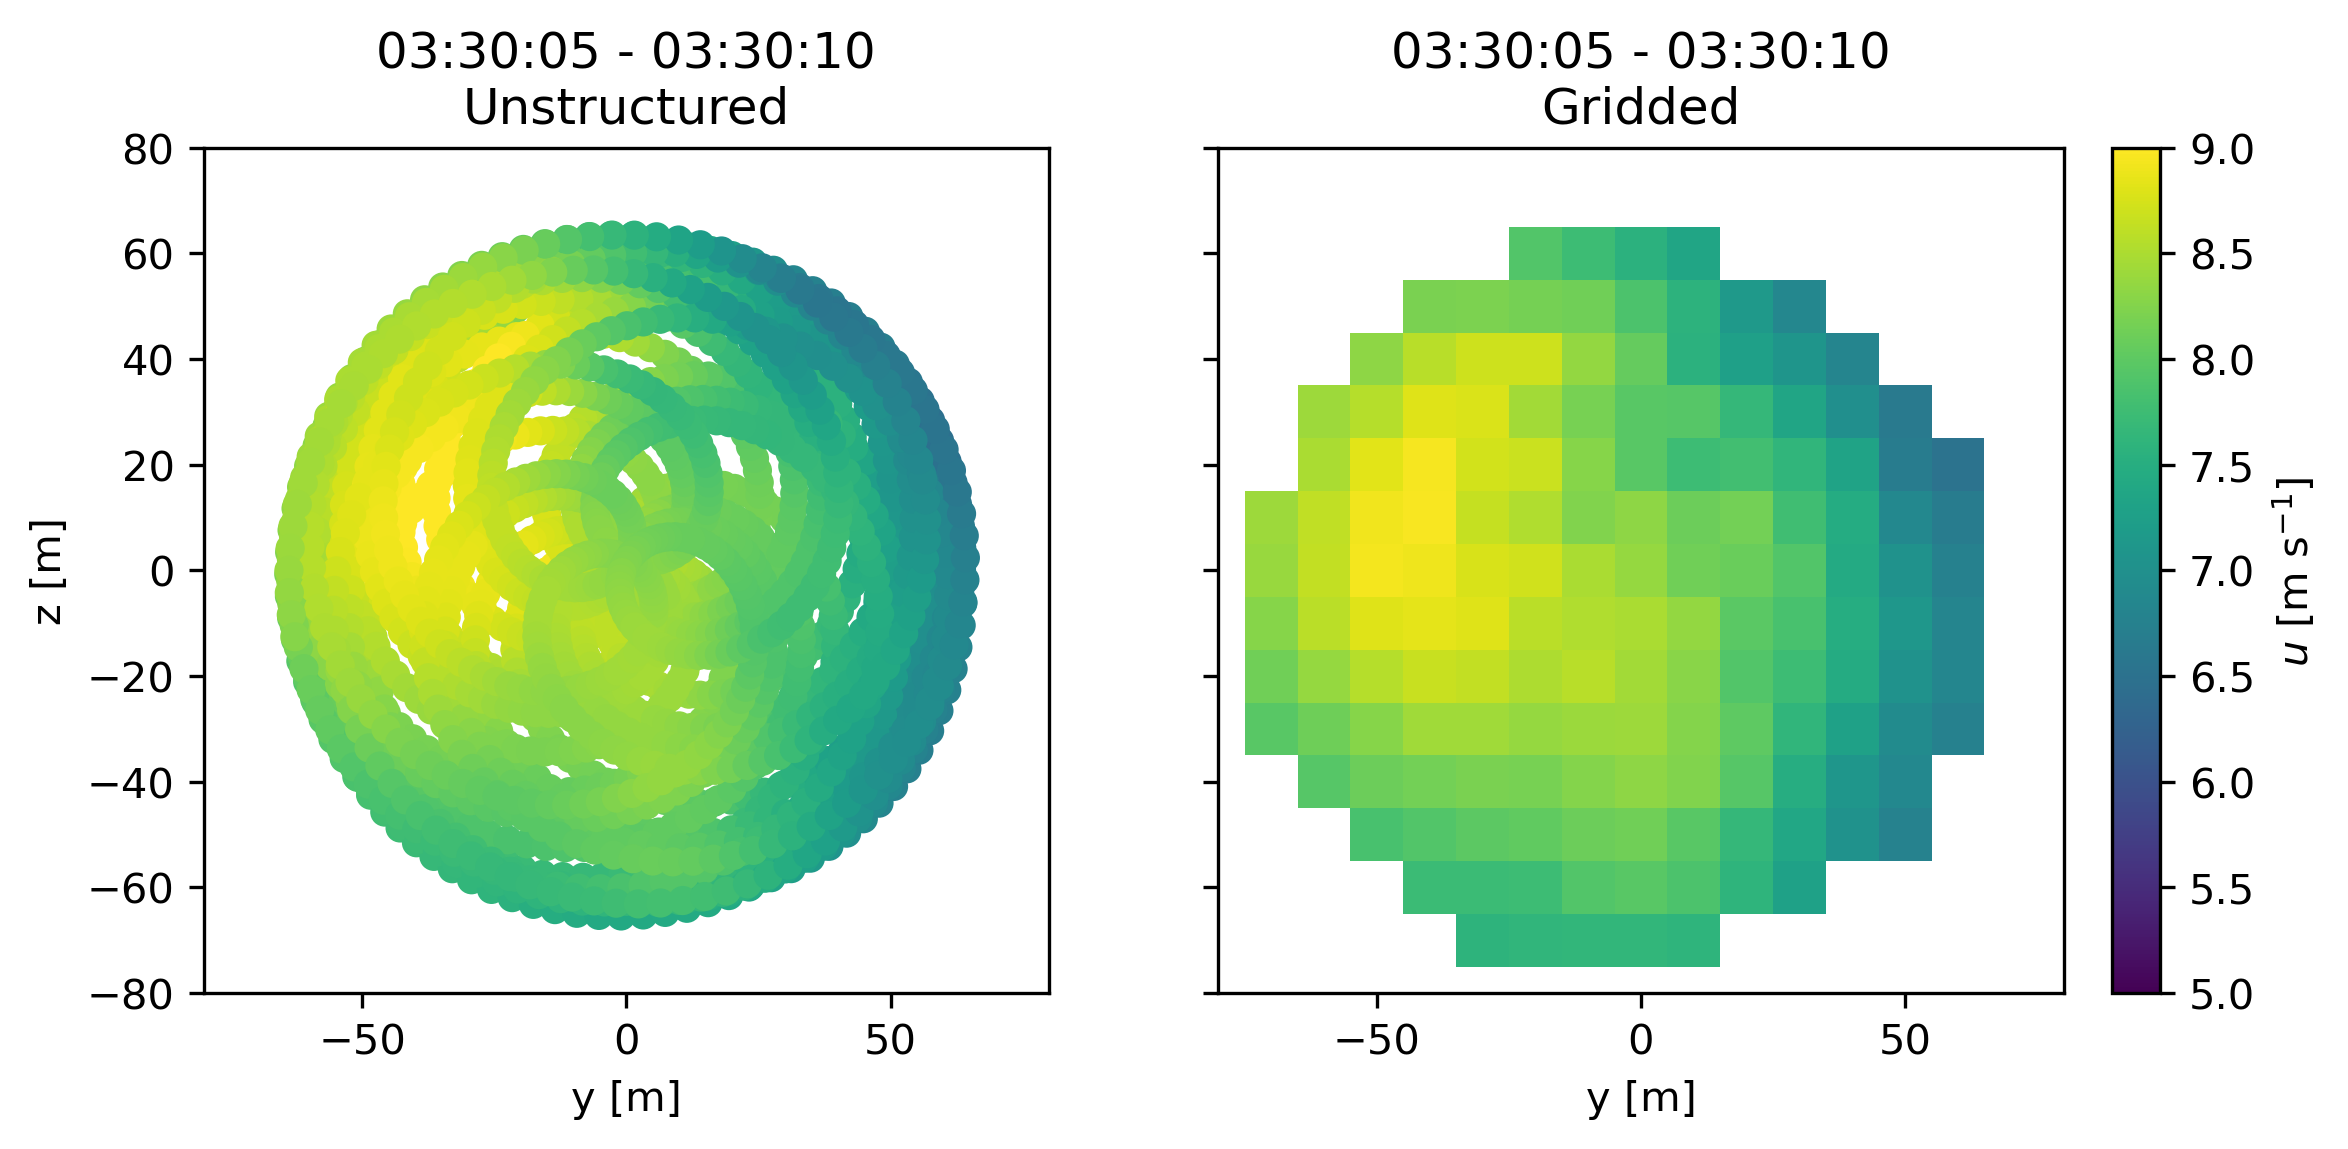

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(8,4), dpi=300, sharex=True, sharey=True)

## Decorate
ax[0].set_xlim(ds_grid['y'].min(), ds_grid['y'].max())
ax[0].set_ylim(ds_grid['z'].min(), ds_grid['z'].max())

for axs in ax:
    axs.set_xlabel('y [m]')
ax[0].set_ylabel('z [m]')

vmin, vmax = 5, 9

for axs in ax:
    axs.set_box_aspect(1)

# Data
start_time, end_time = tgrid[1], tgrid[2]
df_raw_plt = df_trim = df[(df.index < end_time) & (df.index > start_time)]    

ax[0].set_title(f'{start_time.strftime("%H:%M:%S")} - {end_time.strftime("%H:%M:%S")}\nUnstructured')
im0 = ax[0].scatter(df_raw_plt['yplot'],
           df_raw_plt['zplot'],
           c=df_raw_plt['vmeas'],
           vmin=vmin,
           vmax=vmax,
           cmap='viridis')


ax[1].set_title(f'{start_time.strftime("%H:%M:%S")} - {end_time.strftime("%H:%M:%S")}\nGridded')
# im1 = ax[1].imshow(ds_grid['u'].sel(time=start_time).values.T,
#                    origin='lower',
#                    vmin=vmin,
#                    vmax=vmax)
im1 = ax[1].pcolormesh(ds_grid['y'],
                       ds_grid['z'],
                       ds_grid['vlos'].sel(time=start_time).values.T,
                       vmin=vmin,
                       vmax=vmax)


cax0 = fig.add_axes([ax[-1].get_position().x1+0.02,
                     ax[-1].get_position().y0,
                     0.02,
                     ax[-1].get_position().y1-ax[-1].get_position().y0])
cbar0 = fig.colorbar(im0, cax=cax0)
cbar0.set_label('$u$ [m s$^{-1}$]')
cbar0.ax.tick_params()

# plt.savefig('figs/spinner_lidar_gridded_demo.png', bbox_inches='tight')

plt.show()

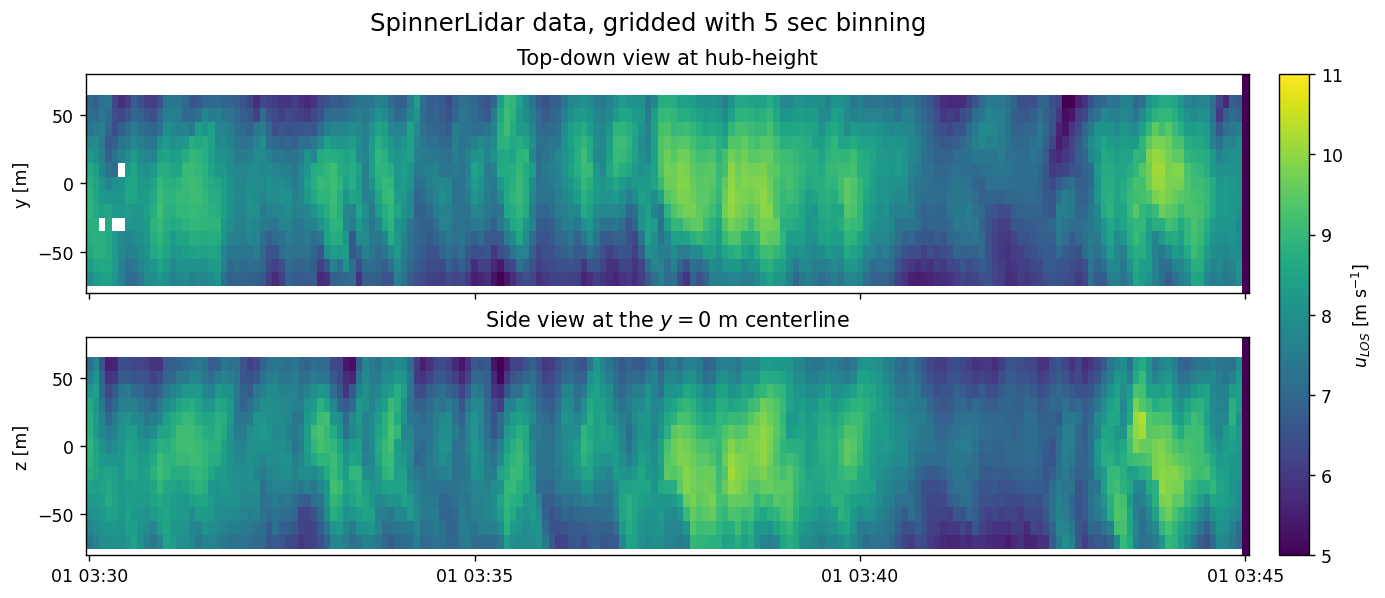

In [9]:
fig, ax = plt.subplots(2, 1, figsize=(12,5), sharex=True, dpi=125)

## Decorate
ax[0].set_ylabel('y [m]')
ax[1].set_ylabel('z [m]')
ax[0].set_ylim(ds_grid['y'].min(), ds_grid['y'].max())
ax[1].set_ylim(ds_grid['z'].min(), ds_grid['z'].max())
ax[0].set_title('Top-down view at hub-height')
ax[1].set_title('Side view at the $y=0$ m centerline')
plt.suptitle(f"SpinnerLidar data, gridded with {dt_grid} sec binning", fontsize=14)

vmin, vmax = 5, 11

im0 = ax[0].pcolormesh(ds_grid['time'],
                       ds_grid['y'],
                       ds_grid['vlos'].isel(z=7).values,
                       vmin=vmin,
                       vmax=vmax)

im1 = ax[1].pcolormesh(ds_grid['time'],
                       ds_grid['z'],
                       ds_grid['vlos'].isel(y=7).values,
                       vmin=vmin,
                       vmax=vmax)

cax0 = fig.add_axes([ax[-1].get_position().x1+0.02,
                     ax[-1].get_position().y0,
                     0.02,
                     ax[0].get_position().y1-ax[-1].get_position().y0])
cbar0 = fig.colorbar(im0, cax=cax0)
cbar0.set_label('$u_{LOS}$ [m s$^{-1}$]')
cbar0.ax.tick_params()


plt.show()

# Batch process data

In [10]:
### Grid many files
## Specify the files
all_files = []
f_parent_batch = Path('/projects/wakedynamics/orybchuk/bcs-ldm/analyze/inflow_validation/sandia_scripts/OSSE_Spinners/')
for i in range(3):
    all_files.append(Path(f_parent_batch, f'sim{str(i+2)}/MatlabProcessedSpinner.csv'))
    
## Iterate over files
all_ds = []
for f_in in all_files:
    df = pd.read_csv(f_in)
    n_rows = len(df)
    
    # Add proper time axis to df
    ref_time = pd.Timestamp('1970-01-01 03:30:00')
    rel_time = (1e9*(df['trueScanTime'] - df['trueScanTime'].iloc[0])).astype('timedelta64[ns]')
    df['time'] = ref_time + rel_time
    df = df.set_index('time')
    
    # Center coords on the turbine
    df['yplot'] = df['yplot'] - df['yplot'].mean()
    df['zplot'] = df['zplot'] - df['zplot'].mean()
    
    ## Create a gridded version of spinner measurements
    # Grid properties
    dy_grid, dz_grid = 10, 10  # meters
    dt_grid = 5  # sec
    tgrid_start = pd.Timestamp(df.index[0]).ceil(freq='s')
    tgrid_end = pd.Timestamp(df.index[-1]).floor(freq='s')
    tgrid = pd.date_range(tgrid_start, tgrid_end, freq=f'{dt_grid}s')

    # Initialize an Xarray Dataset
    ycoords = np.arange(-80, 80+dy_grid, dy_grid)
    zcoords = np.arange(-80, 80+dz_grid, dz_grid)

    coords_grid = {'y': ycoords,
                   'z': zcoords,
                   'time': tgrid}

    ds_grid = xr.Dataset(coords_grid)

    ## Populate Dataset
    vlos_gridded = np.zeros((len(ycoords), len(zcoords), len(tgrid)))

    # Binned statistic approach
    #   See the following for helpful context
    #   https://stackoverflow.com/questions/66673822/is-there-a-way-to-bin-a-set-of-2d-coordinates-in-python
    #   https://stackoverflow.com/questions/68984073/how-to-put-a-grid-for-example-dividing-the-x-y-plane-into-bins-on-an-image-t
    ycoords4binning = np.append(ycoords, ycoords[-1]+dy_grid)
    zcoords4binning = np.append(zcoords, zcoords[-1]+dz_grid)
    for tstep in range(len(tgrid)-1):
        # Trim to sub-period
        start_time, end_time = tgrid[tstep], tgrid[tstep+1]
        df_trim = df[(df.index < end_time) & (df.index > start_time)]    
        # Bin
        ycoord_data = df_trim['yplot'].values
        zcoord_data = df_trim['zplot'].values
        vlos_data = df_trim['vmeas'].values
        binned_results = binned_statistic_2d(x=ycoord_data,
                                             y=zcoord_data,
                                             values=vlos_data,
                                             statistic='mean',
                                             bins=(ycoords4binning, zcoords4binning))

        vlos_gridded[:,:,tstep] = binned_results.statistic.copy()

    ds_grid['vlos'] = (('y', 'z', 'time'), vlos_gridded)
    ds_grid.to_netcdf(Path(f_in.parent, 'gridded_vlos.nc'))
    
    all_ds.append(ds_grid.copy())

In [11]:
### Concatenate all ensemble members
ds_concat = xr.concat(all_ds, dim='ens')
ds_concat.to_netcdf(Path(f_parent_batch, 'spinner_recon_ensemble.nc'))

In [12]:
ds_concat

<xarray.Dataset>
Dimensions:  (y: 17, z: 17, time: 181, ens: 3)
Coordinates:
  * y        (y) int64 -80 -70 -60 -50 -40 -30 -20 -10 0 10 20 30 40 50 60 70 80
  * z        (z) int64 -80 -70 -60 -50 -40 -30 -20 -10 0 10 20 30 40 50 60 70 80
  * time     (time) datetime64[ns] 1970-01-01T03:30:00 ... 1970-01-01T03:45:00
Dimensions without coordinates: ens
Data variables:
    vlos     (ens, y, z, time) float64 nan nan nan nan nan ... nan nan nan 0.0